In [1]:
import matplotlib.pyplot as plt
from tsfresh import extract_features, select_features, extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import joblib
import os
from tqdm import tqdm
from sklearn.metrics import r2_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from scipy import stats

from custom.main import *

ImportError: cannot import name 'data' from 'data' (unknown location)

In [2]:
today = str(datetime.today())[:10]

setup_dict = setup_experiment(today, 'F380 M2/M3', {
    'train_start': '2017-03-21',
    'train_end': '2023-01-01',
    'test_start': '2023-01-01',
    'test_end': '2023-12-01'
})

setup_dict

{'save_path': 'experiments/2024-01-04',
 'model': 'experiments/2024-01-04\\model',
 'pickles': 'experiments/2024-01-04\\pickles',
 'target_col': 'F380 M2/M3',
 'train_start': '2017-03-21',
 'train_end': '2023-01-01',
 'test_start': '2023-01-01',
 'test_end': '2023-12-01'}

In [3]:
data = prepare_data(today, data_path='data/data_2023-12-18.csv', ti=setup_dict)
data



PICKLE FILE CREATED: experiments/2024-01-04/pickles/results_variance=0.2


'experiments/2024-01-04/pickles/results_variance=0.2'

PICKLE FILE CREATED: experiments/2024-01-04/pickles/results_variance=0.2


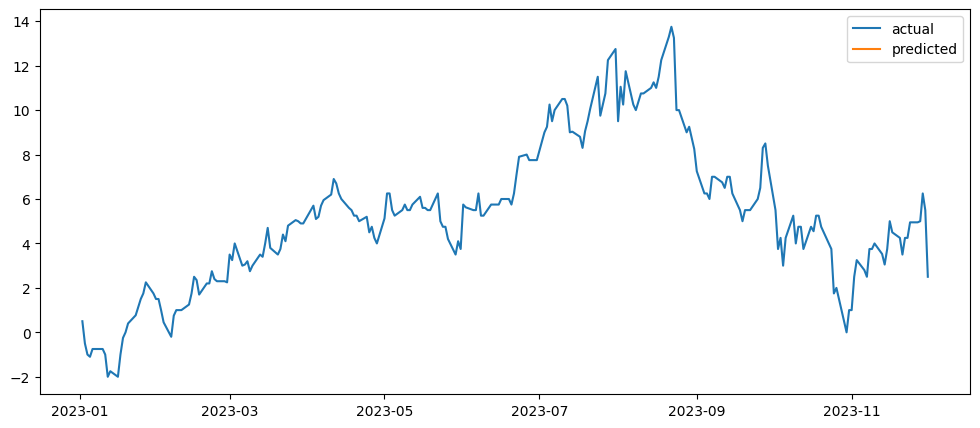

In [5]:
pickle_file = prepare_data(today=today, data_path='data/data_2023-12-18.csv', ti=setup_dict)
results = pickle.load(open(f'experiments/{today}/pickles/results_variance=0.2', 'rb'))

to_predict = results['target_feature'].get_target_feature('2023-12-01', '2023-01-01', True)

plt.figure(figsize=(12, 5))
plt.plot(to_predict['actual_target'], label='actual')
plt.plot(to_predict['predicted_target'], label='predicted')
plt.legend()
plt.show()

In [6]:
to_predict

,actual_target,actual_feature,predicted_target,predicted_feature
pricing_date,,,,
2023-01-02,0.50,1.10,NaN,NaN
2023-01-03,-0.50,0.80,NaN,NaN
2023-01-04,-1.00,0.35,NaN,NaN
2023-01-05,-1.10,-0.12,NaN,NaN
2023-01-06,-0.75,-0.57,NaN,NaN
...,...,...,...,...
2023-11-27,4.95,4.38,NaN,NaN
2023-11-28,5.00,4.68,NaN,NaN
2023-11-29,6.25,5.08,NaN,NaN


In [28]:
features, y = results['data'].copy(), results['target_feature'].get_target_feature('2023-12-01', '2017-01-01', True)
features.reset_index(inplace=True)
y.reset_index(inplace=True)

extracted = extract_features(features, column_sort="pricing_date", column_id='pricing_date')

Feature Extraction: 100%|██████████| 30/30 [39:19<00:00, 78.64s/it]  


In [32]:
impute(extracted)
y.set_index('pricing_date', inplace=True)
# y['actual_target'] = y['actual_target'].rolling(5).mean()

# extracted = extracted.iloc[5:, :]
# y = y.iloc[5:, :]

features_filtered = select_features(extracted, y['actual_target'])
features_filtered

c:\Users\dinar\AppData\Local\Programs\Python\Python310\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning:

The columns ['ALVARI__mean_abs_change' 'ALVARI__mean_change'
 'ALVARI__mean_second_derivative_central' ...
 'dow_sin__permutation_entropy__dimension_7__tau_1'
 'dow_sin__query_similarity_count__query_None__threshold_0.0'
 'dow_sin__mean_n_absolute_max__number_of_maxima_7'] did not have any finite values. Filling with zeros.



,year_sin__benford_correlation,"_rgp_01_sz_3__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","_rgp_01_sz_3__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","_rgp_01_sz_3__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","_rgp_01_sz_3__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)",_rgp_01_sz_3__quantile__q_0.9,_rgp_01_sz_3__quantile__q_0.8,_rgp_01_sz_3__quantile__q_0.7,_rgp_01_sz_3__maximum,_rgp_01_sz_3__quantile__q_0.4,...,"METS__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",METS__sum_values,"METS__fft_coefficient__attr_""real""__coeff_0","METS__fft_coefficient__attr_""abs""__coeff_0",METS__absolute_maximum,"METS__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)",UNIPECSG__count_below__t_0,UNIPECSG__value_count__value_0,UNIPECSG__range_count__max_1__min_-1,_rgp_03_sz_3__value_count__value_0
2017-03-21,0.864123,-1469.855149,-657.339206,-464.809010,-929.618020,-2396.666667,-2396.666667,-2396.666667,-2396.666667,-2396.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2017-03-22,0.864123,-1706.313070,-763.086403,-539.583570,-1079.167141,-2782.222222,-2782.222222,-2782.222222,-2782.222222,-2782.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2017-03-23,0.864123,-629.986595,-281.738570,-199.219253,-398.438507,-1027.222222,-1027.222222,-1027.222222,-1027.222222,-1027.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2017-03-24,0.864123,117.206808,52.416478,37.064047,74.128094,191.111111,191.111111,191.111111,191.111111,191.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2017-03-27,0.864123,765.251429,342.230843,241.993750,483.987500,1247.777778,1247.777778,1247.777778,1247.777778,1247.777778,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,0.295657,308.690024,138.050376,97.616357,195.232714,503.333333,503.333333,503.333333,503.333333,503.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2023-11-28,0.295657,135.727236,60.699065,42.920721,85.841441,221.309524,221.309524,221.309524,221.309524,221.309524,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2023-11-29,0.295657,125.895104,56.302002,39.811527,79.623055,205.277778,205.277778,205.277778,205.277778,205.277778,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2023-11-30,0.295657,83.256747,37.233549,26.328095,52.656190,135.753968,135.753968,135.753968,135.753968,135.753968,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [9]:
train_start, train_end, test_start, test_end = setup_dict['train_start'], setup_dict['train_end'], setup_dict['test_start'], setup_dict['test_end']

train = features_filtered[features_filtered.index < test_start]
test  = features_filtered[(features_filtered.index >= test_start) & (features_filtered.index <= test_end)]




In [16]:
y

,actual_target,actual_feature,predicted_target,predicted_feature
pricing_date,,,,
2017-03-28,-0.04,-0.04,-0.25,-0.04
2017-03-29,-0.09,-0.09,-0.15,-0.09
2017-03-30,-0.13,-0.13,-0.10,-0.13
2017-03-31,-0.16,-0.16,-0.25,-0.16
2017-04-03,-0.14,-0.14,0.05,-0.14
...,...,...,...,...
2023-11-27,4.38,4.38,NaN,NaN
2023-11-28,4.68,4.68,NaN,NaN
2023-11-29,5.08,5.08,NaN,NaN


# Iterative without double for loop

In [17]:
results_df = pd.DataFrame(columns=['pricing_date', 'preds', 'target', 'forecast_date'])
market_data = features_filtered.copy()
y = y['actual_target'] 

def train_ridge(features_filtered, test, y, z=10.000):
    results_df = pd.DataFrame(columns=['pricing_date', 'preds', 'target', 'forecast_date'])
    full_history = features_filtered.copy()
    
    for date in test.index.tolist():
        date = str(date)[:10]
        X_train = full_history[full_history.index < date]
        y_train = y[y.index < date]
        
        X_test, y_test = full_history[full_history.index >= date], y[y.index >= date]
        
        beta = Ridge(alpha=z, solver='svd', fit_intercept=False).fit(X_train, y_train).coef_
        
        forecast = X_test @ beta
        
        results_df = pd.concat([results_df, pd.DataFrame({
            'pricing_date': [X_test.index[0]],
            'preds': [forecast.values[0]],
            'target': [y_test[0]],
        })], ignore_index=True)
                    
                    
    return results_df


In [75]:
print(results_df)

   pricing_date      preds    target forecast_date
0    2023-01-02   2.251508  0.500000           NaN
1    2023-01-03   1.127459 -0.500000           NaN
2    2023-01-04   2.003816 -1.000000           NaN
3    2023-01-05   0.832140 -1.100000           NaN
4    2023-01-06   0.008253 -0.750000           NaN
5    2023-01-09  -5.591083 -0.750000           NaN
6    2023-01-10  -5.988899 -0.750000           NaN
7    2023-01-11  -4.361211 -1.000000           NaN
8    2023-01-12  -2.313135 -2.000000           NaN
9    2023-01-13  -2.286842 -1.750000           NaN
10   2023-01-16  -3.155901 -2.000000           NaN
11   2023-01-17  -2.234724 -1.000000           NaN
12   2023-01-18  -1.903671 -0.250000           NaN
13   2023-01-19  -1.576940  0.000000           NaN
14   2023-01-20  -1.723594  0.400000           NaN
15   2023-01-23  -4.122827  0.766667           NaN
16   2023-01-24  -3.181846  1.133333           NaN
17   2023-01-25  -0.637435  1.500000           NaN
18   2023-01-26   0.556821  1.7

In [77]:
show_plot(results_df, 'z=100k_virtue.png')

# Pipeline with MinMaxScaler

In [128]:
def train_ridge(features_filtered, train, test, y, z=10.000):
    results_df = pd.DataFrame(columns=['pricing_date', 'preds', 'target'])
    full_history = features_filtered.copy()
    
    scaler = MinMaxScaler().fit(train)
    y_scaler = MinMaxScaler().fit(y[y.index < test.index.min()])
    
    
    for date in test.index.tolist():
        date = str(date)[:10]
        X_train = scaler.transform(full_history[full_history.index < date])
        y_train = y_scaler.transform(y[y.index < date])[:, 0]
        print('Train:', X_train.shape, y_train.shape)
        
        X_test, y_test = scaler.transform(full_history[full_history.index >= date]), y_scaler.transform(y[y.index >= date])[:, 0]
        print('Test:', X_test.shape, y_test.shape)
        
        beta = Ridge(alpha=z, solver='svd', fit_intercept=False).fit(X_train, y_train).coef_
        
        forecast = X_test @ beta
        
        results_df = pd.concat([results_df, pd.DataFrame({
            'pricing_date': [date],
            'preds': y_scaler.inverse_transform(np.array([forecast]).reshape(-1, 1))[0],
            # 'preds': [forecast[0]],
            'target': y_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))[0],
        })], ignore_index=True)
                    
                    
    return results_df

In [129]:
y = results['target_feature'].get_target_feature('2023-03-01', '2017-01-01', True)[['actual_target']]

results_df = train_ridge(features_filtered, train, test, y, z=100.000)

Train: (1509, 978) (1509,)
Test: (43, 978) (43,)
Train: (1510, 978) (1510,)
Test: (42, 978) (42,)
Train: (1511, 978) (1511,)
Test: (41, 978) (41,)
Train: (1512, 978) (1512,)
Test: (40, 978) (40,)
Train: (1513, 978) (1513,)
Test: (39, 978) (39,)
Train: (1514, 978) (1514,)
Test: (38, 978) (38,)
Train: (1515, 978) (1515,)
Test: (37, 978) (37,)
Train: (1516, 978) (1516,)
Test: (36, 978) (36,)
Train: (1517, 978) (1517,)
Test: (35, 978) (35,)
Train: (1518, 978) (1518,)
Test: (34, 978) (34,)
Train: (1519, 978) (1519,)
Test: (33, 978) (33,)
Train: (1520, 978) (1520,)
Test: (32, 978) (32,)
Train: (1521, 978) (1521,)
Test: (31, 978) (31,)
Train: (1522, 978) (1522,)
Test: (30, 978) (30,)
Train: (1523, 978) (1523,)
Test: (29, 978) (29,)
Train: (1524, 978) (1524,)
Test: (28, 978) (28,)
Train: (1525, 978) (1525,)
Test: (27, 978) (27,)
Train: (1526, 978) (1526,)
Test: (26, 978) (26,)
Train: (1527, 978) (1527,)
Test: (25, 978) (25,)
Train: (1528, 978) (1528,)
Test: (24, 978) (24,)
Train: (1529, 978) (

In [130]:
results_df['forecast_date'] = None
# results_df['preds'] = results_df['preds'].apply(lambda x: x[0])
show_plot(results_df, 'z=100k_standardize_target.png')

In [122]:
results_df

,pricing_date,preds,target,forecast_date
0,2023-01-02,[3.760067740393082],0.150877,None
1,2023-01-03,[2.1081818809374893],0.136842,None
2,2023-01-04,[3.6578962537102755],0.129825,None
3,2023-01-05,[2.1214815004634526],0.128421,None
4,2023-01-06,[1.5915627686311085],0.133333,None
5,2023-01-09,[6.570875942308892],0.133333,None
6,2023-01-10,[5.3347236236739946],0.133333,None
7,2023-01-11,[5.925238262781149],0.129825,None
8,2023-01-12,[1.4154402008600413],0.115789,None
9,2023-01-13,[1.2769973442956206],0.119298,None


# Standard virtue pipeline

Super time-consuming!

In [10]:
z_values = [10**-3, 10**2, 10**3, 10**4,  10**5, 10**6, 10**7, 10**8, 10**9]
backtest = []
y = y['actual_target']

t_values = y[y.index >= setup_dict['test_start']].index


for t in t_values:
    test_start = str(t)[:10]
    
    for z in z_values:
        R = y[y.index < test_start]                                         # y_train
        R_s = y[y.index >= test_start]                                      # y_test
        S = features_filtered[features_filtered.index < test_start]         # x_train
        S_t = features_filtered[features_filtered.index >= test_start]      # x_test
        
        T, nr_cols = S.shape
        beta = Ridge(alpha=z, solver='svd', fit_intercept=False).fit(S, R).coef_
        beta_norm = np.sqrt((beta ** 2).sum())
        
        forecast = S_t @ beta
        timing_strategy = forecast * R_s
        
        backtest.append({'z': z, 'beta_norm': beta_norm, 'index': forecast.index[0], 
                        'forecast': forecast.values[0], 'timing_strategy': timing_strategy.values[0],
                        'return': R_s[0]})



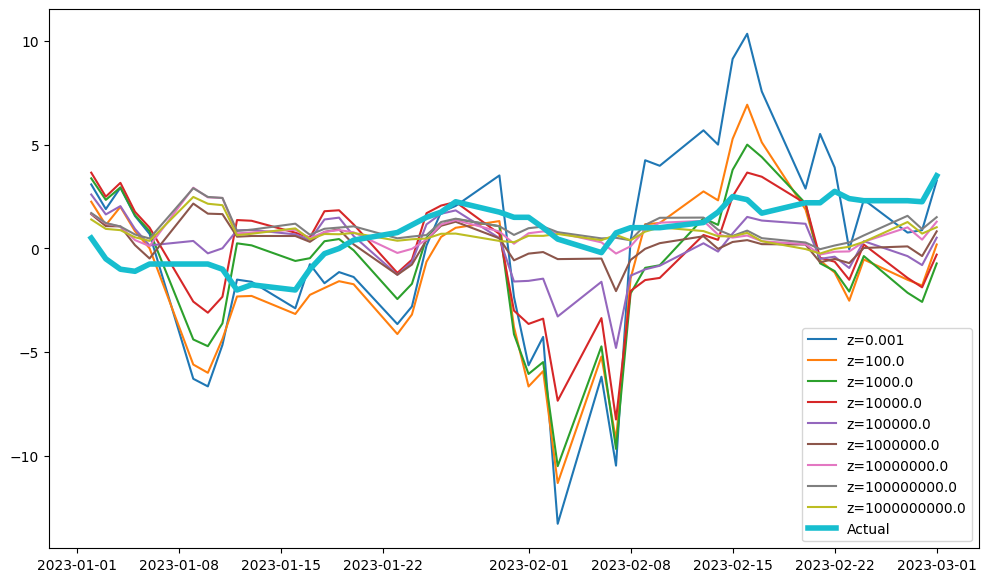

In [11]:
results = pd.DataFrame(backtest)

plt.figure(figsize=(12, 7))

for res in results.groupby('z'):
    idx, r = res
    plt.plot(r['index'], r['forecast'], label=f'z={idx}')

plt.plot(y[y.index > '2023-01-01'], label='Actual', linewidth=4)
plt.legend()
plt.show()

In [12]:
results_df = {}

for res in results.groupby('z'):
    z, r = res
    results_df[str(z)] = r
    

results_df

{'0.001':          z  beta_norm      index   forecast  timing_strategy    return
 0    0.001  88.286411 2023-01-02   3.083515         1.541757  0.500000
 10   0.001  87.525921 2023-01-03   1.895260        -0.947630 -0.500000
 20   0.001  86.759117 2023-01-04   2.927729        -2.927729 -1.000000
 30   0.001  85.819007 2023-01-05   1.565331        -1.721864 -1.100000
 40   0.001  85.138976 2023-01-06   0.700602        -0.525452 -0.750000
 50   0.001  84.751621 2023-01-09  -6.277827         4.708370 -0.750000
 60   0.001  85.960399 2023-01-10  -6.643127         4.982345 -0.750000
 70   0.001  87.516464 2023-01-11  -4.646549         4.646549 -1.000000
 80   0.001  87.794796 2023-01-12  -1.500721         3.001443 -2.000000
 90   0.001  87.663465 2023-01-13  -1.605477         2.809584 -1.750000
 100  0.001  87.630835 2023-01-16  -2.881739         5.763478 -2.000000
 110  0.001  87.812738 2023-01-17  -0.758289         0.758289 -1.000000
 120  0.001  87.710640 2023-01-18  -1.674059         0.

In [13]:
import param
import numpy as np
import panel as pn
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

pn.config.js_files["jquery"]="https://code.jquery.com/jquery-1.12.4.min.js"
pn.config.js_files["sparkline"]="https://cdnjs.cloudflare.com/ajax/libs/jquery-sparklines/2.1.2/jquery.sparkline.min.js"

pn.extension('tabulator', 'plotly', 'ipywidgets', 'perspective',  css_files=[pn.io.resources.CSS_URLS['font-awesome']], sizing_mode='stretch_width', omms='ipywidgets')

pn.config.js_files["sparkline_to_tabulator"]="https://cdn.jsdelivr.net/gh/MarcSkovMadsen/awesome-panel-assets@master/js/add_spark_lines_to_tabulator.min.js"



In [35]:
RESULTS = None

checkboxes = pn.widgets.CheckBoxGroup(name='Checkbox Group', value=['0.001'], options=list(results_df.keys()), inline=False, margin=(20, 10, 10, 10))

def custom_pnl_10(y_pred, y_true):
    nth = len(y_pred)
    y_pred, y_true = list(y_pred.values), list(y_true.values)

    thresh = 0.2
    
    try:
        diff = y_pred[-1] - y_pred[0]
    except IndexError:
        diff = y_pred[-1] - y_pred[0]

    direction = 1 if diff > thresh else (-1 if diff < thresh else 0)
    pnl = diff * direction

    return 'pnl', pnl


def create_pnl(df_copy):
    results = {}
    
    if RESULTS is not None:
        for z in RESULTS.keys():
            results[z] = custom_pnl_10(RESULTS[z]['preds'], RESULTS[z]['target'])[1]

        return pd.DataFrame(results.values(), index=results.keys(), columns=['pnl'])

    return pd.DataFrame()


@pn.depends(checkboxes.param.value)
def update_pnl_df(sel):
    if RESULTS is not None:
        return create_pnl(RESULTS)
    
    
    
    
    return create_pnl(RESULTS)

In [36]:

@pn.depends(checkboxes.param.value)
def update_plot(selected):
    global RESULTS
    
    RESULTS = {}
    
    sel = [results_df.get(key) for key in selected]

    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=y[y.index > '2023-01-01'].index, y=y[y.index > '2023-01-01'], name=f'Actual', connectgaps=False))
    
    for unique in sel:
        print('UNIQUE', unique)
        fig.add_trace(go.Scatter(x=unique['index'], y=unique['forecast'], name=f'z={unique.z.unique()[0]}', connectgaps=False))

        RESULTS[unique.z.unique()[0]] = {'preds': unique['forecast'], 'target': y[y.index > '2023-01-01']}

    return fig


pn.Column(checkboxes, update_plot, update_pnl_df).show()

UNIQUE          z  beta_norm      index   forecast  timing_strategy    return
0    0.001  88.286411 2023-01-02   3.083515         1.541757  0.500000
10   0.001  87.525921 2023-01-03   1.895260        -0.947630 -0.500000
20   0.001  86.759117 2023-01-04   2.927729        -2.927729 -1.000000
30   0.001  85.819007 2023-01-05   1.565331        -1.721864 -1.100000
40   0.001  85.138976 2023-01-06   0.700602        -0.525452 -0.750000
50   0.001  84.751621 2023-01-09  -6.277827         4.708370 -0.750000
60   0.001  85.960399 2023-01-10  -6.643127         4.982345 -0.750000
70   0.001  87.516464 2023-01-11  -4.646549         4.646549 -1.000000
80   0.001  87.794796 2023-01-12  -1.500721         3.001443 -2.000000
90   0.001  87.663465 2023-01-13  -1.605477         2.809584 -1.750000
100  0.001  87.630835 2023-01-16  -2.881739         5.763478 -2.000000
110  0.001  87.812738 2023-01-17  -0.758289         0.758289 -1.000000
120  0.001  87.710640 2023-01-18  -1.674059         0.418515 -0.250000

UNIQUE          z  beta_norm      index   forecast  timing_strategy    return
0    0.001  88.286411 2023-01-02   3.083515         1.541757  0.500000
10   0.001  87.525921 2023-01-03   1.895260        -0.947630 -0.500000
20   0.001  86.759117 2023-01-04   2.927729        -2.927729 -1.000000
30   0.001  85.819007 2023-01-05   1.565331        -1.721864 -1.100000
40   0.001  85.138976 2023-01-06   0.700602        -0.525452 -0.750000
50   0.001  84.751621 2023-01-09  -6.277827         4.708370 -0.750000
60   0.001  85.960399 2023-01-10  -6.643127         4.982345 -0.750000
70   0.001  87.516464 2023-01-11  -4.646549         4.646549 -1.000000
80   0.001  87.794796 2023-01-12  -1.500721         3.001443 -2.000000
90   0.001  87.663465 2023-01-13  -1.605477         2.809584 -1.750000
100  0.001  87.630835 2023-01-16  -2.881739         5.763478 -2.000000
110  0.001  87.812738 2023-01-17  -0.758289         0.758289 -1.000000
120  0.001  87.710640 2023-01-18  -1.674059         0.418515 -0.250000